https://lovit.github.io/nlp/2018/04/17/word_cloud/ 
워드 클라우드 그룹 컬러링


In [1]:
import nltk 
from konlpy.tag import Okt; t = Okt()

In [234]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
    

In [260]:
from palettable.colorbrewer.qualitative import Dark2_8

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

ModuleNotFoundError: No module named 'palettable'

In [2]:
with open("chosun_2016.data", "r", encoding='utf-8') as f : 
    headlines = f.read()

In [245]:
headlines

'{\'politics\': [[\'朴대통령, 아베와 통화… 저녁엔 "최선의 노력" 對국민 메시지\', "北김양건 노동당 비서 29일 교통사고로 사망...\'권력암투說\'도 제기돼", \'文대표 사퇴 안하기로 결론… 언제 얼마나 탈당할지만 남아\', \'"김양건,신의주-평양 도로서 軍 화물차량에 부딪쳐 사망"…北선 "의도적 암살" 소문\', \'[단독] "북한 김경희 피살설, 권력층 내부에 퍼지고 있다"\', \'반기문 선두… 2위권 후보들과 12~17%P 격차\', \'호남, 安신당 32.6>더민주 18.5… "지지黨 없다" 35.9%\', \'[속보]한일 장관회담 타결…일본 "위안부 문제 日정부 책임 통감" "아베 총리 사죄·반성" "예산 10억엔 거출"\', "총선 \'내조의 여왕\' 나선 \'미녀 3총사\'", \'野, 권은희 데려올 땐 "정의의 상징"이라더니…\', "약칭 \'더민주당\' 못쓰자 \'더민주\'로", \'김한길계 서울·光州 동시 탈당… 권노갑 등 동교동계도 나간다\', \'위안부 할머니 설득하는 자리에 차관들 보낸 외교장관\', \'암살 가능성 낮다지만… 對南총책 전임자 이어 또 교통사고死\', \'조동원, 안철수에 "나 같으면 부끄러워 얼굴 못들 것"\', \'문재인 대표 부산 사무실서 인질극 1시간여만에 종료\', "\'애연가\' 김정은, 평양 지하철서 불붙은 담배꽁초 막 버려…지하철에 재떨이 놓고 흡연", "[단독] 새정치연합, 새 당명 \'더불어민주당\'으로 결정", \'김현철, YS 서거 전 문재인에 "정치노선 같이 할 생각"\', \'서울, 與黨·安신당 접전… 2030, 더민주가 安신당 앞서\', \'[오늘의 판 북한] 北 군인들 차력쇼…그제 김정은 최고사령관 추대일\', \'문재인, 탈당파에 전면전 선언\', \'北가족에 돈 보내는 탈북자 63%가 "年100만~200만원"\', "\'거물을 이긴다\'…여야 초선들의 환호", \'安신당, 黨대표로 정운찬 前총리 영입 추진\', "지지율 왜 안 뜨지?… \'대구 眞朴\' 때문에 

In [246]:
# heads = eval(headlines)
# heads

In [247]:
# poli = []
# for n in range(52):
#     poli.extend(heads['politics'][n])
    
# poli

In [248]:
# headlines = ''.join(poli)
# headlines

In [3]:
tokens = t.morphs(headlines)
tokens

["{'",
 'politics',
 "':",
 "[['",
 '朴',
 '대통령',
 ',',
 '아베',
 '와',
 '통화',
 '…',
 '저녁',
 '엔',
 '"',
 '최선',
 '의',
 '노력',
 '"',
 '對',
 '국민',
 '메시지',
 "',",
 '"',
 '北',
 '김양건',
 '노동당',
 '비서',
 '29일',
 '교통사고',
 '로',
 '사망',
 "...'",
 '권력',
 '암투',
 '說',
 "'",
 '도',
 '제기',
 '돼',
 '",',
 "'",
 '文',
 '대표',
 '사퇴',
 '안',
 '하기로',
 '결론',
 '…',
 '언제',
 '얼마나',
 '탈당',
 '할지만',
 '남아',
 "',",
 '\'"',
 '김양건',
 ',',
 '신의주',
 '-',
 '평양',
 '도로',
 '서',
 '軍',
 '화물',
 '차량',
 '에',
 '부딪쳐',
 '사망',
 '"…',
 '北',
 '선',
 '"',
 '의도',
 '적',
 '암살',
 '"',
 '소문',
 "',",
 "'[",
 '단독',
 ']',
 '"',
 '북한',
 '김경희',
 '피살',
 '설',
 ',',
 '권력',
 '층',
 '내부',
 '에',
 '퍼지고',
 '있다',
 '"\',',
 "'",
 '반기문',
 '선두',
 '…',
 '2',
 '위',
 '권',
 '후보',
 '들',
 '과',
 '12~17%',
 'P',
 '격차',
 "',",
 "'",
 '호남',
 ',',
 '安',
 '신당',
 '32.6',
 '>',
 '더',
 '민주',
 '18.5',
 '…',
 '"',
 '지지',
 '黨',
 '없다',
 '"',
 '35.9%',
 "',",
 "'[",
 '속보',
 ']',
 '한일',
 '장관',
 '회담',
 '타결',
 '…',
 '일본',
 '"',
 '위안부',
 '문제',
 '日',
 '정부',
 '책임',
 '통감',
 '"',
 '"',
 '아베',
 '총리

In [4]:
ch = nltk.Text(tokens, name='chosun')
ch

<Text: chosun>

In [249]:

ch = nltk.Text(tokens, name='chosun')
ch.vocab().most_common(10)

[("'", 7284),
 ('"', 4108),
 (',', 3016),
 ("',", 3016),
 ('의', 2444),
 ('…', 2184),
 ('",', 1924),
 ('"\',', 1456),
 ('에', 1404),
 (']', 1404),
 ('·', 1352),
 ("'[", 1196),
 ('들', 988),
 ('"\'', 728),
 ("\\'", 728),
 ('\'"', 676),
 ('으로', 676),
 ('한', 676),
 ('은', 676),
 ('노소영', 572),
 ('로', 520),
 ('\'",', 520),
 ('최태원', 520),
 ('서', 468),
 ('...', 468),
 ('北', 416),
 ('과', 416),
 ('오늘', 416),
 ('을', 416),
 ('(', 416),
 ('1', 416),
 ('적', 364),
 ('단독', 364),
 ('관장', 364),
 ('결혼', 364),
 ('운세', 364),
 ('음력', 364),
 ('11월', 364),
 (")',", 364),
 ('위', 312),
 ('더', 312),
 ('"[', 312),
 ('SK', 312),
 ('회장', 312),
 ('대', 312),
 ('도', 260),
 ('-', 260),
 ('위안부', 260),
 ('하는', 260),
 ('전', 260)]

In [250]:
# 2016년
stop_words = ["'", '"', ',', '','…', '에', '이', '의', '·', '을', '은', '한', '...',
             '가', ']', '도', '들', '1', '는', '?', '로', '에서', '위', '과', '..', '된','서', '앞', '‘','(', '[',
             '\'…', '.', '2', '수', '세', '를', '지난', '자', "때", "못", '""', '…"', '명',
             '까지', '으로', ")',", '"\'', "',", "'[", '"\\', "\\'", '",' , '\'"', '"…', '\'",',
             '"\',', '대', '와', '우리', '"[', '안', '것', '더', '고', "?", "살", "부터", "오늘", "?',",
             "두", "…'", ')', '왜', 'Why', '하는', '가장', '있는', "대통령", "세계", "운세", "6월", 
             "음력", "한국", "여성조선", "단독", "발견", "할", "받아", "덮", "네", "이번", "'",
             "',",',', '"', ']', "'[", '…', '의', '에', '"\',', '다', '해', '라', '뒤', 
             '기', '적', '만', '’', '…"\',', '하지', '지', '사람',"['", '”', '“',
             '만에', '장', "'\\'", '-', '전', '그', '있다', '고백', '등', '간', '날', "'],", "…',",
             "[],", '[]],', '정치', '사회', '[]],', '[[],', "’'," ,"['[", "경제",
             '’…', '내', '했다', '이유', "국제", "당", "문", "스포츠", "영상", "문화",
             "속보"] 

tokens = [word for word in tokens if word not in stop_words]

ch = nltk.Text(tokens, name='chosun')
most = ch.vocab().most_common(50)
most

[('노소영', 572),
 ('최태원', 520),
 ('北', 416),
 ('관장', 364),
 ('결혼', 364),
 ('11월', 364),
 ('SK', 312),
 ('회장', 312),
 ('위안부', 260),
 ('정명훈', 260),
 ('탈당', 208),
 ('권', 208),
 ('安', 208),
 ('신당', 208),
 ('김정은', 208),
 ('그룹', 208),
 ('이혼', 208),
 ('부모', 208),
 ('친구', 208),
 ('남편', 208),
 ('10', 208),
 ('코리아', 208),
 ('딸', 208),
 ('감독', 208),
 ('술', 208),
 ('사건', 208),
 ('사진', 208),
 ('1월', 208),
 ('12월', 208),
 ('아베', 156),
 ('엔', 156),
 ('김양건', 156),
 ('사망', 156),
 ('대표', 156),
 ('선', 156),
 ('민주', 156),
 ('日', 156),
 ('정부', 156),
 ('얼굴', 156),
 ('문재인', 156),
 ('제', 156),
 ('前', 156),
 ('수사', 156),
 ('서울시', 156),
 ('경찰', 156),
 ('속', 156),
 ('혼외자', 156),
 ('4', 156),
 ('폭행', 156),
 ('m', 156)]

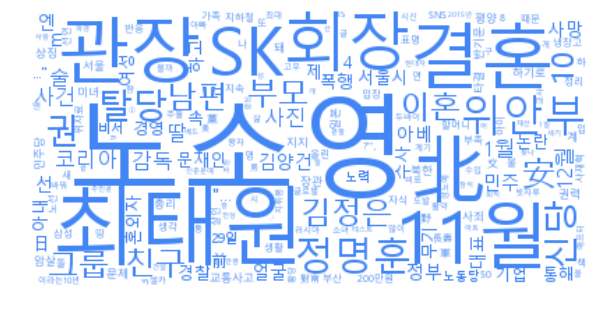

In [265]:
words = [w[0] for w in most[:10]]
color_to_words =  {'color': ['word', 'sk']}
simple_color_func = SimpleGroupedColorFunc(color_to_words, '#4285f4')
wordcloud.recolor(color_func=simple_color_func)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [222]:
from matplotlib import font_manager, rc 
import pandas as pd
import numpy as np
import platform
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

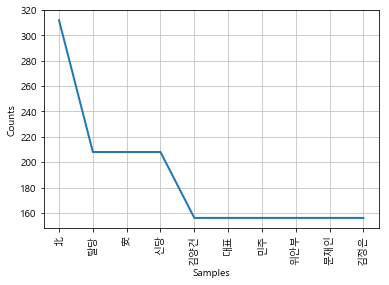

<Figure size 1080x432 with 0 Axes>

In [229]:
ch.plot(10)
plt.figure(figsize=(15, 6))
plt.show()

In [210]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [259]:
data = ch.vocab().most_common(300)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

NameError: name 'Dark2_8' is not defined